### Goal: to retrieve professionally collected weather data from an online source to predict coffee harvests in Minas Gerais, Brazil

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
#Monthly Medians
monthly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/MonthlyMedians.csv")
#Yearly Medians
yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/YearlyMedians.csv")
#Yearly Harvest Data fro ALL regions in Brazil
harvest_yearly = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/br_final.csv")
#Harvest Data for Minas Gerais combined with collected weather data
minas_harvest = pd.read_csv("/Users/sa12/Documents/Repositories/WeatherDataMG/weather_api/data/csv/harvest_weather.csv")

## How have harvest outcomes changed for Minas Gerais throughout the years?

<Axes: xlabel='year', ylabel='million_60kgs_bag'>

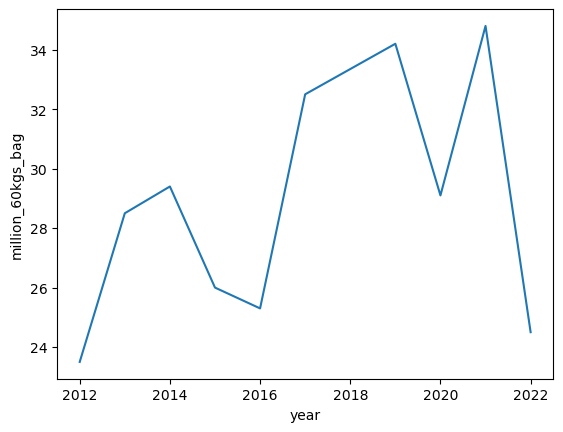

In [134]:
sns.lineplot(data=minas_harvest, x=minas_harvest["year"], y=minas_harvest["million_60kgs_bag"])

Harvests for Minas Gerais have fluctuated greatly over the years. 

##### Are these harvest outcomes similar to other regions in Brazil?

<Axes: xlabel='subdivision'>

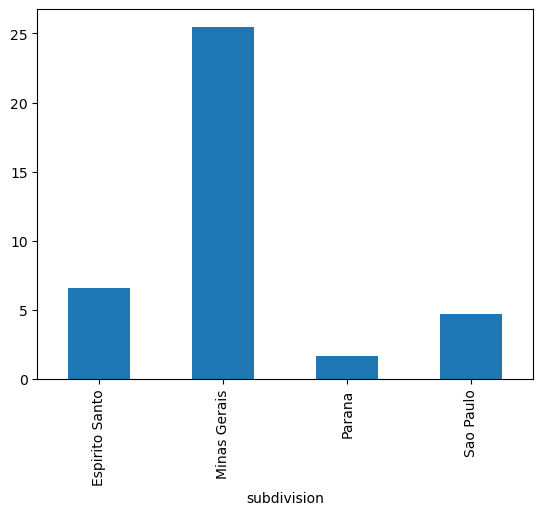

In [136]:
h1 = harvest_yearly.groupby("subdivision")["million_60kgs_bag"].mean()
h1.plot.bar()

<Axes: xlabel='year', ylabel='million_60kgs_bag'>

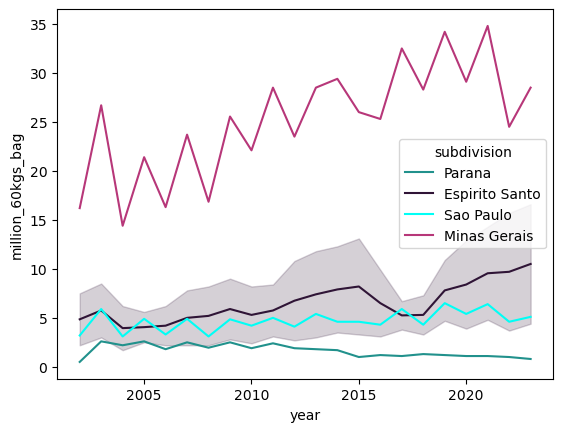

In [214]:
harvest_yearly_index = harvest_yearly.set_index(["year"])
parana = harvest_yearly[harvest_yearly["subdivision"] == "Parana"]
minas = harvest_yearly[harvest_yearly["subdivision"] == "Minas Gerais"]
espirit = harvest_yearly[harvest_yearly["subdivision"] == "Espirito Santo"]
paulo = harvest_yearly[harvest_yearly["subdivision"] == "Sao Paulo"]
sns.lineplot(data=parana, x=parana["year"], y=parana["million_60kgs_bag"], hue=parana["subdivision"], palette="viridis")
sns.lineplot(data=espirit, x=espirit["year"], y=espirit["million_60kgs_bag"], hue=espirit["subdivision"], palette="twilight")
sns.lineplot(data=paulo, x=paulo["year"], y=paulo["million_60kgs_bag"], hue=paulo["subdivision"],palette="hsv")
sns.lineplot(data=minas, x=minas["year"], y=minas["million_60kgs_bag"], hue=minas["subdivision"],palette="magma")

Harvests for Minas Gerais have been much higher than other coffee producing regions of Brazil. Both graphs show the same trend.

However, other regions of Brazil are experiancing much lower variation per crop. I wonder if the size of each crop is influencing these trends. Let's compare the yields.

In [232]:

#yield_pivot = pd.pivot_table(data=harvest_yearly, values=harvest_yearly["bear_mill_trees"], index=harvest_yearly["subdivision"], columns=harvest_yearly["year"], aggfunc="max")

,country,subdivision,type,million_60kgs_bag,nonbear_mill_trees,bear_mill_trees,nonbear_thous_hect,bear_thous_hect,trees_hect_bear,trees_hect_nonbear,avg_unemp_perc
year,,,,,,,,,,,
2002,Brazil,Minas Gerais,Arabica,16.2,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN
2002,Brazil,Espirito Santo,Arabica,2.2,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN
2002,Brazil,Espirito Santo,Robusta,7.5,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN
2002,Brazil,Sao Paulo,Arabica,3.2,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,NaN
2002,Brazil,Parana,Arabica,0.5,1500.0,4465.0,495.0,2120.0,2106.0,3030.0,6.95


In [237]:
#save all subdivisons 
bearp = parana.groupby(parana["year"])["bear_mill_trees"].median()
type(bearp)
print(bearp)
bearmg = minas.groupby(minas["year"])["bear_mill_trees"].median()
beares = espirit.groupby(espirit["year"])["bear_mill_trees"].median()
bearsp = paulo.groupby(paulo["year"])["bear_mill_trees"].median()
#now do the same for subdivisions
nonbearp = parana.groupby(parana["year"])["nonbear_mill_trees"].median()
nonbearmg = minas.groupby(minas["year"])["nonbear_mill_trees"].median()
nonbeares = espirit.groupby(espirit["year"])["nonbear_mill_trees"].median()
nonbearsp = paulo.groupby(paulo["year"])["nonbear_mill_trees"].median()
yield_sizes = pd.DataFrame({}).set_index(harvest_yearly_index)
yield_sizes.join([bearp, bearmg, beares, bearsp, nonbearp, nonbearmg, nonbeares,nonbearsp],on=["year"], how="outer")
#print(all_trees)
#yield_sizes.join(all_trees, on=["year"], how="outer")

'''
yield_sizes = pd.DataFrame({"Parana":[bearp,nonbearp],
                            "Minas Gerais":[bearmg,nonbearmg],
                            "Espirito Santos":[beares, nonbeares],
                            "Sao Paulo":[bearsp,nonbearsp],
})
'''
yield_sizes.plot.bar()



year
2002    4465.0
2003    5265.0
2004    5050.0
2005    5255.0
2006    5330.0
2007    5730.0
2008    5720.0
2009    5770.0
2010    5725.0
2011    5820.0
2012    5760.0
2013    5860.0
2014    5810.0
2015    5770.0
2016    5735.0
2017    5640.0
2018       NaN
2019    5740.0
2020    5700.0
2021    6200.0
2022    6010.0
2023    6100.0
Name: bear_mill_trees, dtype: float64


TypeError: The parameter "keys" may be a column key, one-dimensional array, or a list containing only valid column keys and one-dimensional arrays.. Received column of type <class 'pandas.core.frame.DataFrame'>

In [236]:
all_trees = pd.DataFrame({"Parana":[bearp,nonbearp],
              "Minas Gerais":[bearmg, nonbearmg],
              "Espirito Santos":[beares, nonbeares],
              "Sao Paulo":[bearsp, nonbearsp]
})
all_trees = all_trees.set_index(["year"])
print(all_trees)


KeyError: "None of ['year'] are in the columns"

##### Which region produces the most coffee (by sub-category) in Brazil? 

<Axes: xlabel='type'>

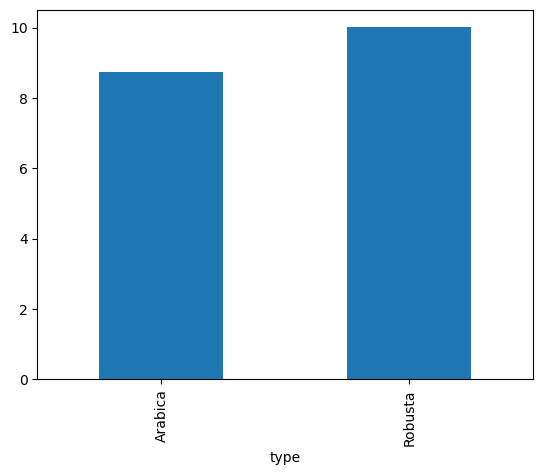

In [192]:
harvest_yearly.groupby("type")["million_60kgs_bag"].mean().plot.bar()

A simple grouping shows Robusta producing more on average per year.
Will compare the means yields of each type from each subdivison to see more.

<Axes: xlabel='type'>

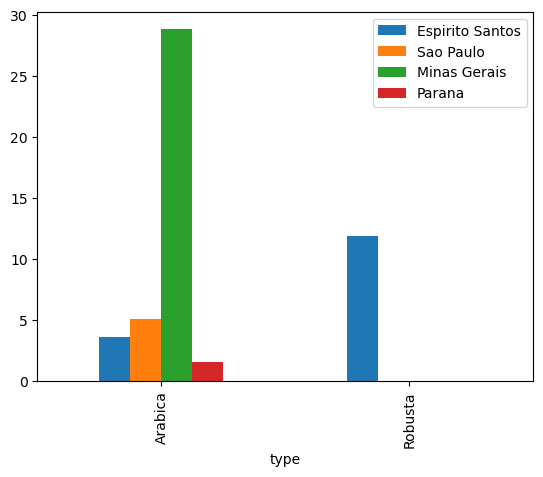

In [188]:
es1 = espirit.groupby(espirit["type"])["million_60kgs_bag"].mean()
sp1 = paulo.groupby(paulo["type"])["million_60kgs_bag"].mean()
mg1 = minas.groupby(paulo["type"])["million_60kgs_bag"].mean()
p1 = parana.groupby(parana["type"])["million_60kgs_bag"].mean()
bag_types = pd.DataFrame({"Espirito Santos": es1,
              "Sao Paulo":sp1,
              "Minas Gerais":mg1,
              "Parana":p1
})
bag_types.plot.bar()

It looks like while the Robusta yields in Espirito Santos are good, the Arabica yields in Minas Gerais far outpace it.
Minas Gerais produces the most Arabica. Espirito Santos produces the most Robusta.

## How has unemployment changed in the various coffee-producing regions of Brazil? 

<Axes: xlabel='subdivision'>

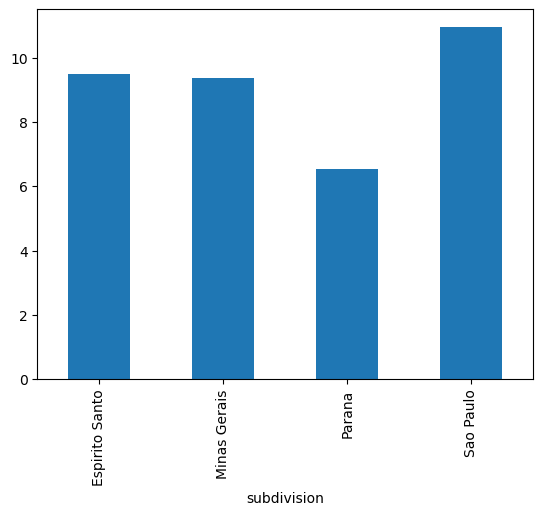

In [139]:
h1 = harvest_yearly.groupby("subdivision")["avg_unemp_perc"].median()
h1.plot.bar()

Sao Paulo has the highest median unemployment%, while Parana has the lowest.

<Axes: xlabel='year', ylabel='avg_unemp_perc'>

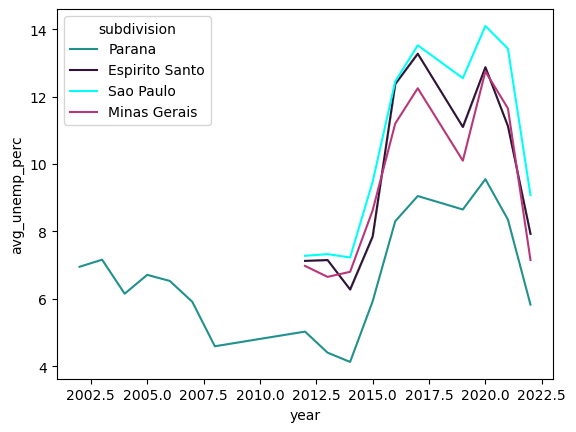

In [150]:
sns.lineplot(data=parana, x=parana["year"], y=parana["avg_unemp_perc"], hue=parana["subdivision"], palette="viridis")
sns.lineplot(data=espirit, x=espirit["year"], y=espirit["avg_unemp_perc"], hue=espirit["subdivision"], palette="twilight")
sns.lineplot(data=paulo, x=paulo["year"], y=paulo["avg_unemp_perc"], hue=paulo["subdivision"],palette="hsv")
sns.lineplot(data=minas, x=minas["year"], y=minas["avg_unemp_perc"], hue=minas["subdivision"],palette="magma")

Unemployment percentages have followed nearly identical patterns over the years, regardless of where the harvest takes place.

## How have weather outcomes changed for Minas Gerais throughout the years? 

<Axes: ylabel='temperature'>

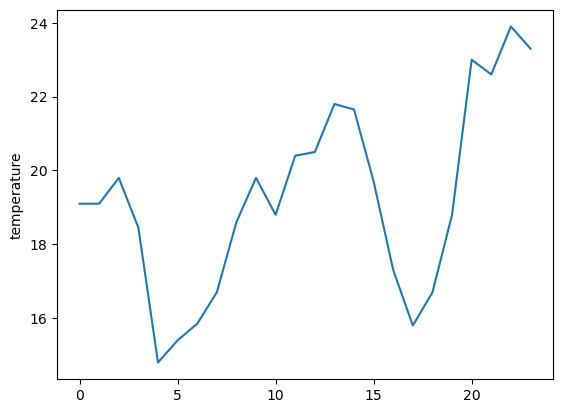

In [141]:
sns.lineplot(monthly["temperature"])

Chart shows two sharp drops around 4 and 17. 
Year 2 had a higher average temperature than Year 1

<Axes: ylabel='temperature'>

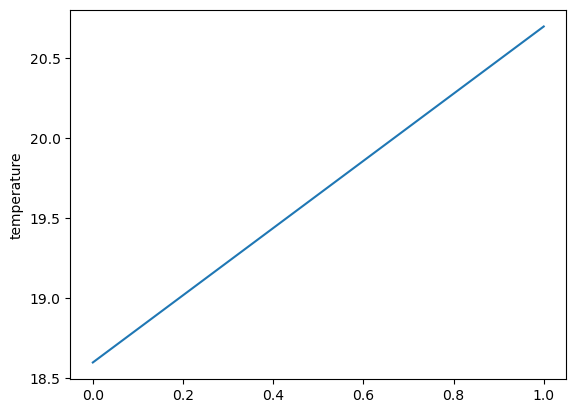

In [142]:
sns.lineplot(yearly["temperature"])

While not very informative, this does confirm year 2 was hotter that year 1.

<Axes: ylabel='precipitation'>

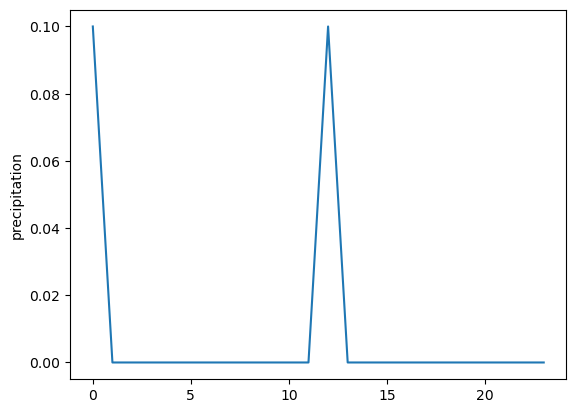

In [143]:
sns.lineplot(monthly["precipitation"])

Precipitation also seems to spike around 12 month cycles.

<Axes: ylabel='humidity'>

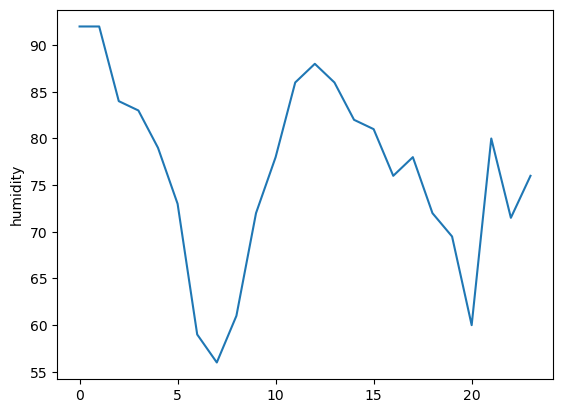

In [144]:
sns.lineplot(monthly["humidity"])

Possible correlation between rainfall and precipitation. Humidity shaply peaks in the same period precipitation occurs. Slowly drops for months after.
Possible correlation with tempurature as well.


<Axes: ylabel='pressure'>

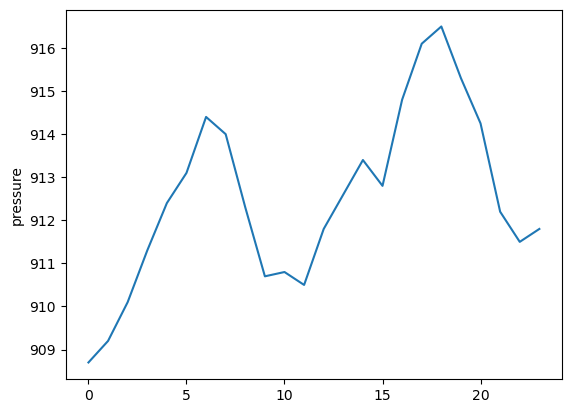

In [238]:
sns.lineplot(monthly["pressure"])

Pressure has a strong inverse correlation with Humidity. However it looks like pressure moves about a month or two sooner than humidity. Let's look more into that

<Axes: xlabel='humidity', ylabel='pressure'>

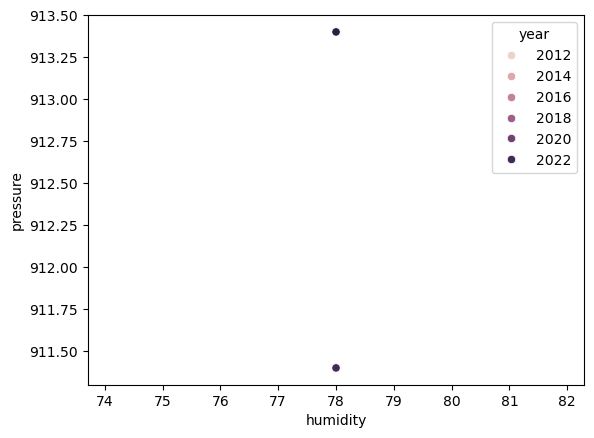

In [153]:
sns.scatterplot(data=minas_harvest, x=minas_harvest["humidity"], y=minas_harvest["pressure"], hue=minas_harvest["year"])

<Axes: xlabel='temperature', ylabel='million_60kgs_bag'>

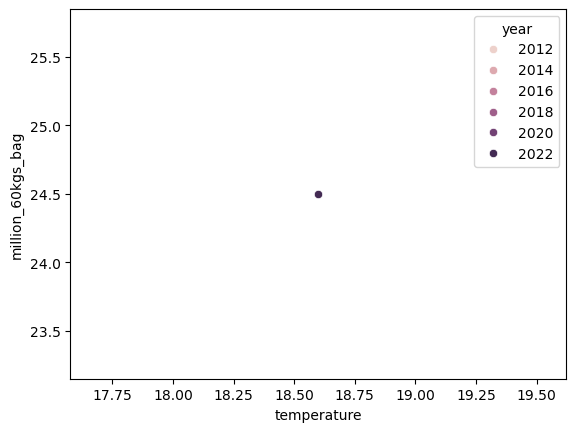

In [148]:
sns.scatterplot(data=minas_harvest, x=minas_harvest["temperature"], y=minas_harvest["million_60kgs_bag"], hue=minas_harvest["year"])